In [3]:
import geopandas as gpd
import pandas as pd

In [27]:
# データを変数に入れる
hokai = pd.read_csv('hokai.csv')

In [18]:
hokai_geo = gpd.read_file('N03-23_01_230101.geojson')

<Axes: >

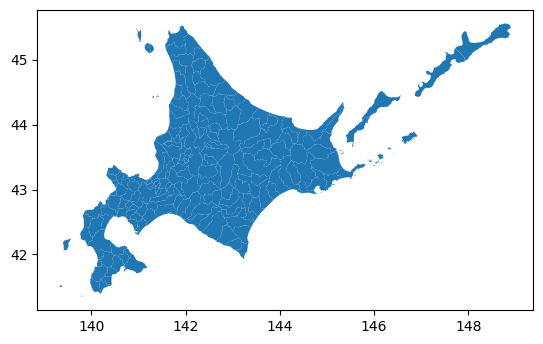

In [20]:
hokai_geo.plot()

In [22]:
hokai_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   9575 non-null   object  
 1   N03_002   9575 non-null   object  
 2   N03_003   7141 non-null   object  
 3   N03_004   9575 non-null   object  
 4   N03_007   9575 non-null   object  
 5   geometry  9575 non-null   geometry
dtypes: geometry(1), object(5)
memory usage: 449.0+ KB


In [28]:
hokai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25699 entries, 0 to 25698
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KEY_CODE  25699 non-null  int64  
 1   HYOSYO    25699 non-null  int64  
 2   CITYNAME  25699 non-null  object 
 3   NAME      25511 non-null  object 
 4   HTKSYORI  25699 non-null  int64  
 5   HTKSAKI   0 non-null      float64
 6   GASSAN    0 non-null      float64
 7   人口総数      25699 non-null  object 
 8   男         25699 non-null  object 
 9   女         25699 non-null  object 
 10  世帯総数      25699 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.2+ MB


In [30]:
hokai_geo.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,北海道,石狩振興局,札幌市,札幌市中央区,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,北海道,石狩振興局,札幌市,札幌市北区,01102,"POLYGON ((141.40839 43.18395, 141.40833 43.183..."
2,北海道,石狩振興局,札幌市,札幌市東区,01103,"POLYGON ((141.44707 43.15616, 141.44694 43.155..."
3,北海道,石狩振興局,札幌市,札幌市白石区,01104,"POLYGON ((141.46244 43.10010, 141.46265 43.100..."
4,北海道,石狩振興局,札幌市,札幌市豊平区,01105,"POLYGON ((141.38463 43.04670, 141.38479 43.046..."


In [31]:
hokai.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数
0,1101,1,札幌市中央区,NaN,0,NaN,NaN,248680,112853,135827,141429
1,11010200,2,札幌市中央区,宮ケ丘（番地）,0,NaN,NaN,5,2,3,2
2,11010300,2,札幌市中央区,円山,0,NaN,NaN,-,-,-,-
3,11010400,2,札幌市中央区,円山西町（番地）,0,NaN,NaN,-,-,-,-
4,11011000,2,札幌市中央区,宮の森,0,NaN,NaN,456,91,365,18


In [33]:
# rename
hokai_geo.rename(columns={'N03_004':'CITYNAME'},inplace=True)

In [35]:
hokai_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   9575 non-null   object  
 1   N03_002   9575 non-null   object  
 2   N03_003   7141 non-null   object  
 3   CITYNAME  9575 non-null   object  
 4   N03_007   9575 non-null   object  
 5   geometry  9575 non-null   geometry
dtypes: geometry(1), object(5)
memory usage: 449.0+ KB


In [36]:
hokai_geo_merge = hokai.merge(hokai_geo,on='CITYNAME')

In [38]:
hokai_geo_merge

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数,N03_001,N03_002,N03_003,N03_007,geometry
0,1101,1,札幌市中央区,NaN,0,NaN,NaN,248680,112853,135827,141429,北海道,石狩振興局,札幌市,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,11010200,2,札幌市中央区,宮ケ丘（番地）,0,NaN,NaN,5,2,3,2,北海道,石狩振興局,札幌市,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
2,11010300,2,札幌市中央区,円山,0,NaN,NaN,-,-,-,-,北海道,石狩振興局,札幌市,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
3,11010400,2,札幌市中央区,円山西町（番地）,0,NaN,NaN,-,-,-,-,北海道,石狩振興局,札幌市,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
4,11011000,2,札幌市中央区,宮の森,0,NaN,NaN,456,91,365,18,北海道,石狩振興局,札幌市,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735272,16940250,2,羅臼町,海岸町,0,NaN,NaN,365,188,177,130,北海道,根室振興局,目梨郡,01694,"POLYGON ((145.34553 44.34058, 145.34551 44.340..."
735273,16940250,2,羅臼町,海岸町,0,NaN,NaN,365,188,177,130,北海道,根室振興局,目梨郡,01694,"POLYGON ((145.34683 44.34055, 145.34681 44.340..."
735274,16940250,2,羅臼町,海岸町,0,NaN,NaN,365,188,177,130,北海道,根室振興局,目梨郡,01694,"POLYGON ((145.34167 44.33963, 145.34170 44.339..."
735275,16940250,2,羅臼町,海岸町,0,NaN,NaN,365,188,177,130,北海道,根室振興局,目梨郡,01694,"POLYGON ((145.34430 44.34140, 145.34432 44.341..."


In [39]:
hokai_geo_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735277 entries, 0 to 735276
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   KEY_CODE  735277 non-null  int64   
 1   HYOSYO    735277 non-null  int64   
 2   CITYNAME  735277 non-null  object  
 3   NAME      726354 non-null  object  
 4   HTKSYORI  735277 non-null  int64   
 5   HTKSAKI   0 non-null       float64 
 6   GASSAN    0 non-null       float64 
 7   人口総数      735277 non-null  object  
 8   男         735277 non-null  object  
 9   女         735277 non-null  object  
 10  世帯総数      735277 non-null  object  
 11  N03_001   735277 non-null  object  
 12  N03_002   735277 non-null  object  
 13  N03_003   218285 non-null  object  
 14  N03_007   735277 non-null  object  
 15  geometry  735277 non-null  geometry
dtypes: float64(2), geometry(1), int64(3), object(10)
memory usage: 89.8+ MB


In [50]:
# change from OBJECT to int
hokai_geo_merge['人口総数'] = hokai_geo_merge['人口総数'].astype('int')

ValueError: invalid literal for int() with base 10: '-'

In [48]:
hokai_geo_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735277 entries, 0 to 735276
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   KEY_CODE  735277 non-null  int64   
 1   HYOSYO    735277 non-null  int64   
 2   CITYNAME  735277 non-null  object  
 3   NAME      726354 non-null  object  
 4   HTKSYORI  735277 non-null  int64   
 5   HTKSAKI   0 non-null       float64 
 6   GASSAN    0 non-null       float64 
 7   人口総数      735277 non-null  object  
 8   男         735277 non-null  object  
 9   女         735277 non-null  object  
 10  世帯総数      735277 non-null  object  
 11  N03_001   735277 non-null  object  
 12  N03_002   735277 non-null  object  
 13  N03_003   218285 non-null  object  
 14  N03_007   735277 non-null  object  
 15  geometry  735277 non-null  geometry
dtypes: float64(2), geometry(1), int64(3), object(10)
memory usage: 89.8+ MB


In [1]:
print('use excel or something to replace the dashes in the fields. -es cannot be read as integers')

use excel or something to replace the dashes in the fields. -es cannot be read as integers
